# E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

## 1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [2]:
# Update URL to point to raw CSV data on GitHub
URL = 'https://raw.githubusercontent.com/Kanchan786786/Marketing_Analytics/main/Customer_Behavior_Data(1).csv'

# Load the CSV file with semicolon delimiter
df = pd.read_csv(URL, delimiter=';')
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Display the first few rows of the dataframe
df.head()

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


## EDA

With every new dataset we need to got through an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to:

- Understand what our columns say
- Rename columns labels and make them lowercase
- Make sure that the data types of columns are correct
- Handle missing values
- Check for duplicates
- Search for outliers
- Check for linearity between variables

To achieve this we can take advantage of Pandas and visualisation libraries

In [3]:
#CHeck for missing values
df.isnull().sum()


account_length                         0
location_code                          0
user_id                                0
credit_card_info_save                  0
push_status                            0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
avg_order_value                        0
sale_product_views                     0
discount_rate_per_visited_products     0
product_detail_view_per_app_session    0
app_transactions                       0
add_to_cart_per_session                0
customer_service_calls                 0
churn                                  0
dtype: int64

In [4]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

In [5]:
# Create a duplicate of the DataFrame
df_copy = df.copy()

In [6]:
# Handling the data for correct formating
columns_to_process = ['add_to_cart_per_session', 'discount_rate_per_visited_products',
                      'product_detail_view_per_app_session', 'avg_order_value']

# Remove commas and convert to numeric
for column in columns_to_process:
    # Remove commas from the values and convert to numeric
    df_copy[column] = df_copy[column].str.replace(',', '.').astype(float)

# Display the data types after processing
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   object 
 4   push_status                          3333 non-null   object 
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

In [7]:
# Create a DataFrame with only numeric columns
numeric_df = df_copy.select_dtypes(include=['int64', 'float64'])

#Moveing the target variable as the first column
if 'churn' in df_copy.columns:
    numeric_df = numeric_df[['churn'] + [col for col in numeric_df.columns if col != 'churn']]

# Check the new DataFrame
numeric_df.head()


,churn,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls
0,0,128,415,3824657,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1
1,0,107,415,3717191,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1
2,0,137,415,3581921,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0
3,0,84,408,3759999,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2
4,0,75,415,3306626,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3


In [8]:
# # Create pair plots for numeric variables
# sns.pairplot(numeric_df)
# plt.show()


## Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [9]:
df_copy.describe()

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## 3. Handle Missing Values

Missing values can be an issue with most real-life datasets. We can use the .info() function, there are no missing values. For the sake of double checking and to show a way of checking whether the dataset has missing values, let's write some code below

**we dont thave the any missing value in this dataset so we donot have to handle this here**

## 4. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [20]:
# Check for duplicate rows
duplicates = df_copy[df_copy.duplicated(keep=False)]

# Display the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [account_length, location_code, user_id, credit_card_info_save, push_status, add_to_wishlist, desktop_sessions, app_sessions, desktop_transactions, total_product_detail_views, session_duration, promotion_clicks, avg_order_value, sale_product_views, discount_rate_per_visited_products, product_detail_view_per_app_session, app_transactions, add_to_cart_per_session, customer_service_calls, churn]
Index: []


## 5. Search for outliers [LP]

- Outliers are data points at the extreme points of a dataset.
- Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
    - Because of this, we need to be careful when we cleanse our data
    - If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
    - If the outliers are errors we should generally remove those data points
    
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use:
- Visualisations such as histograms and blox plots
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

### 6. Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers

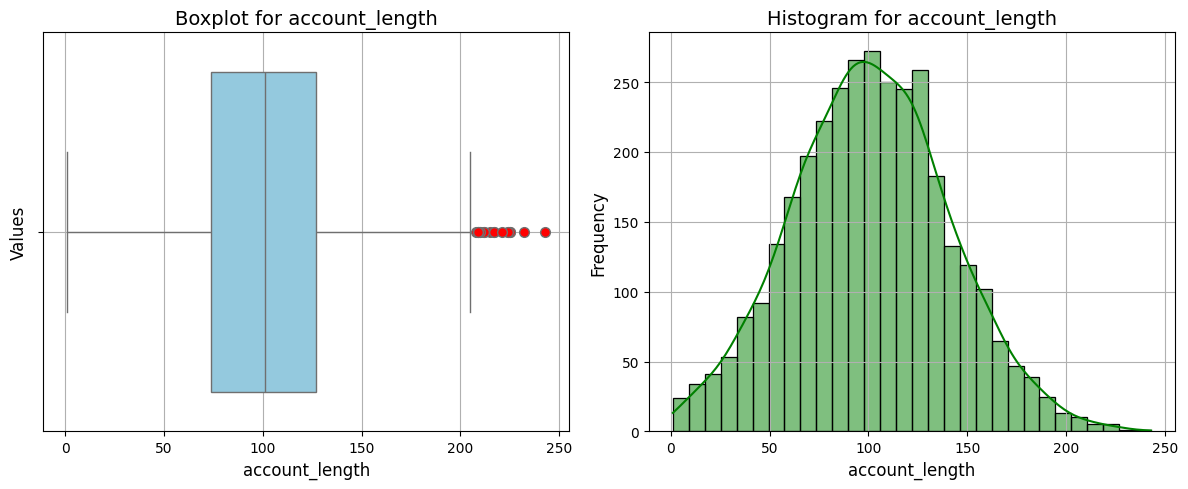

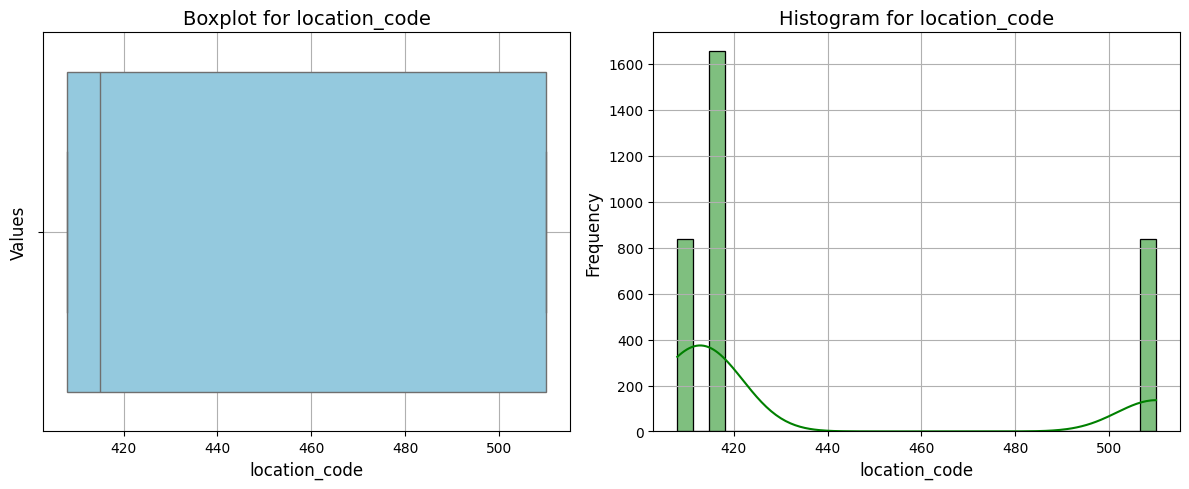

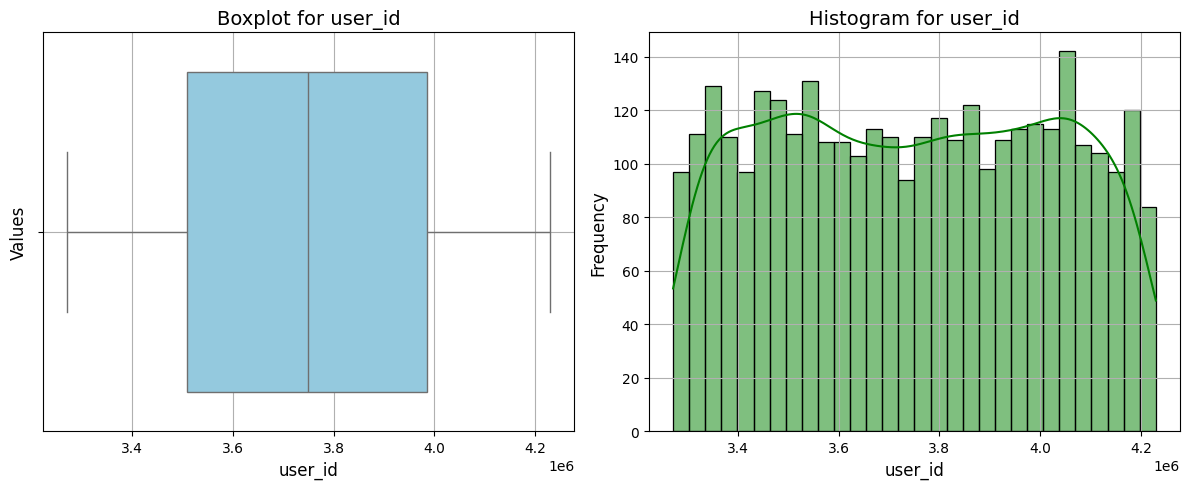

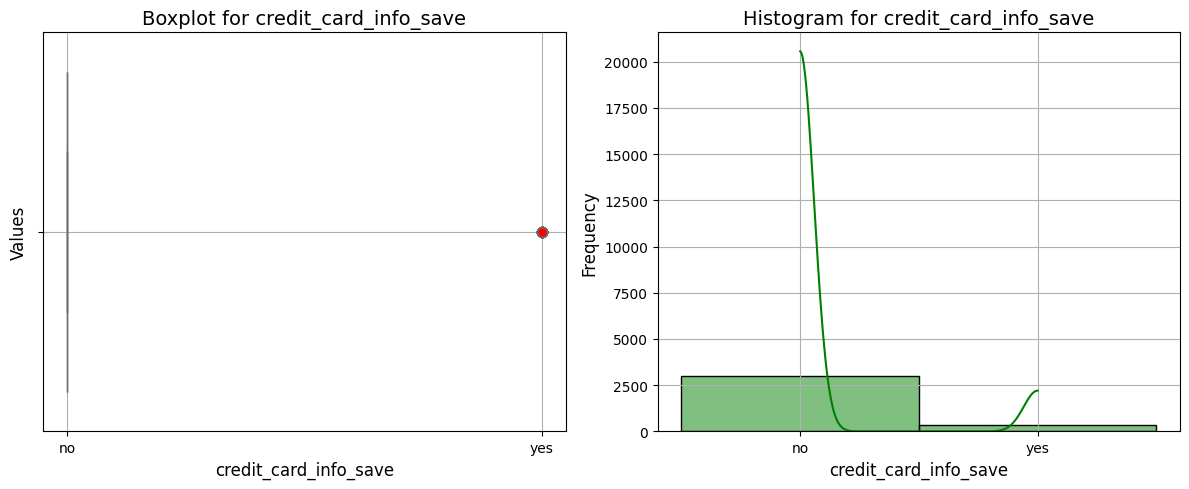

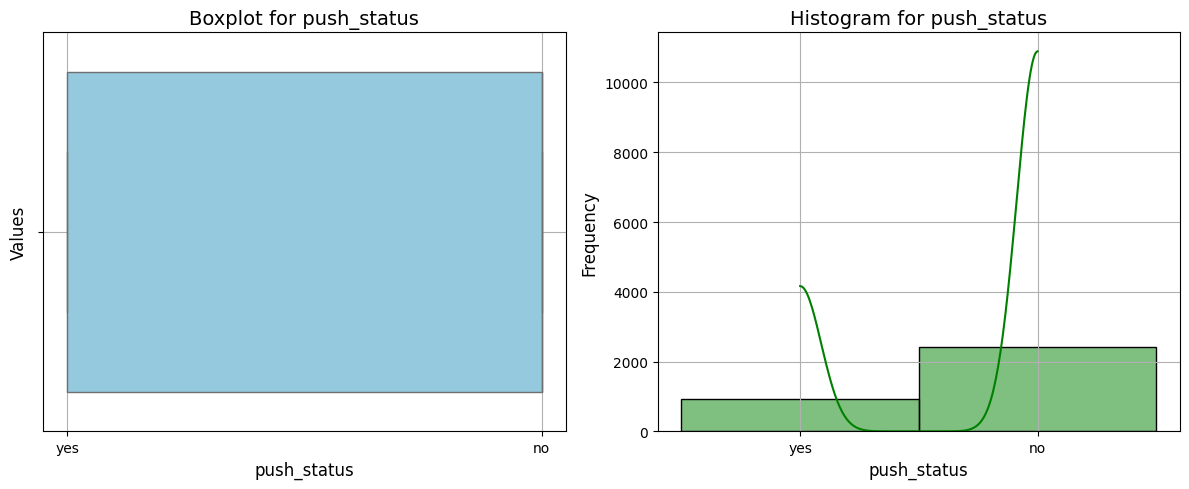

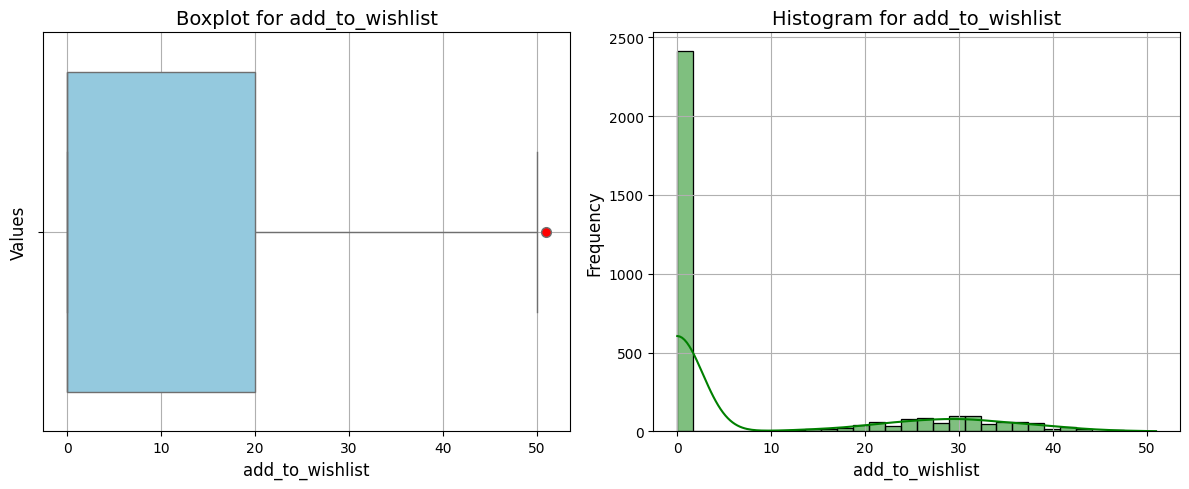

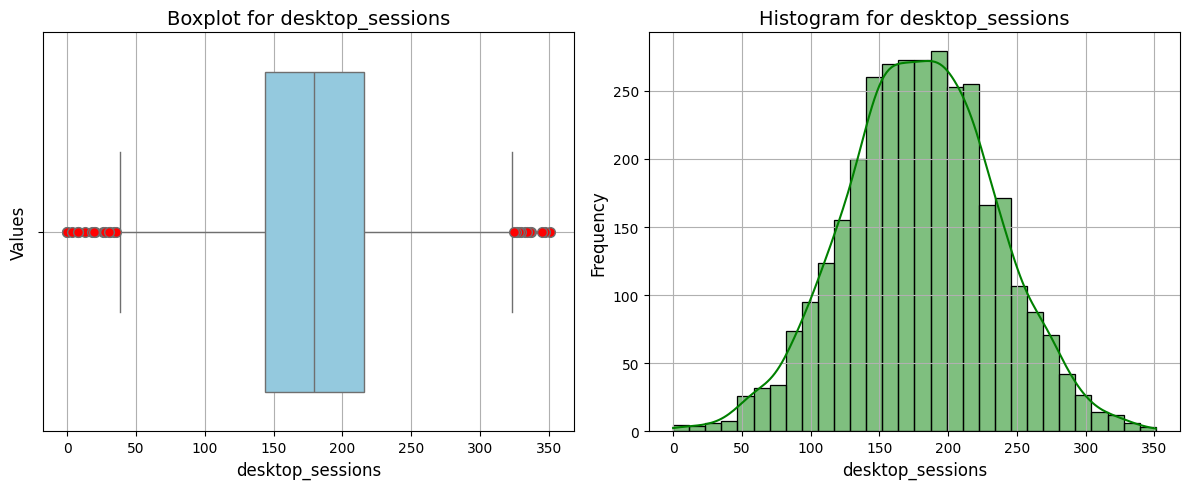

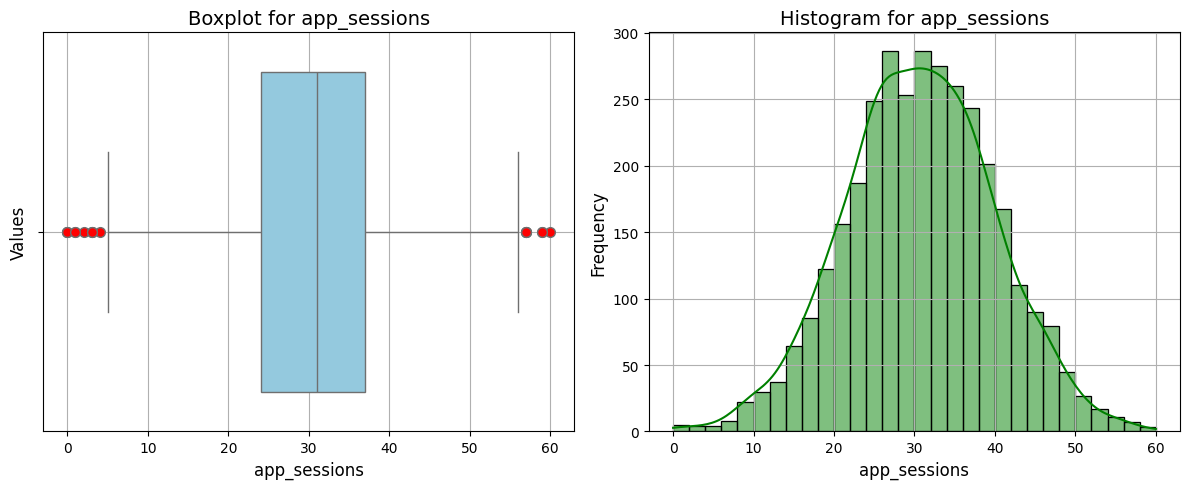

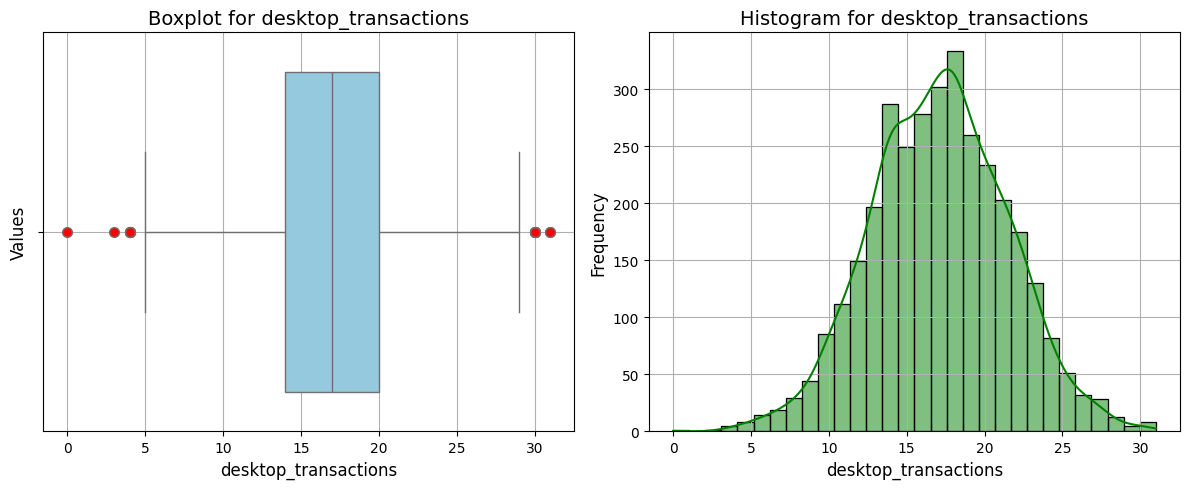

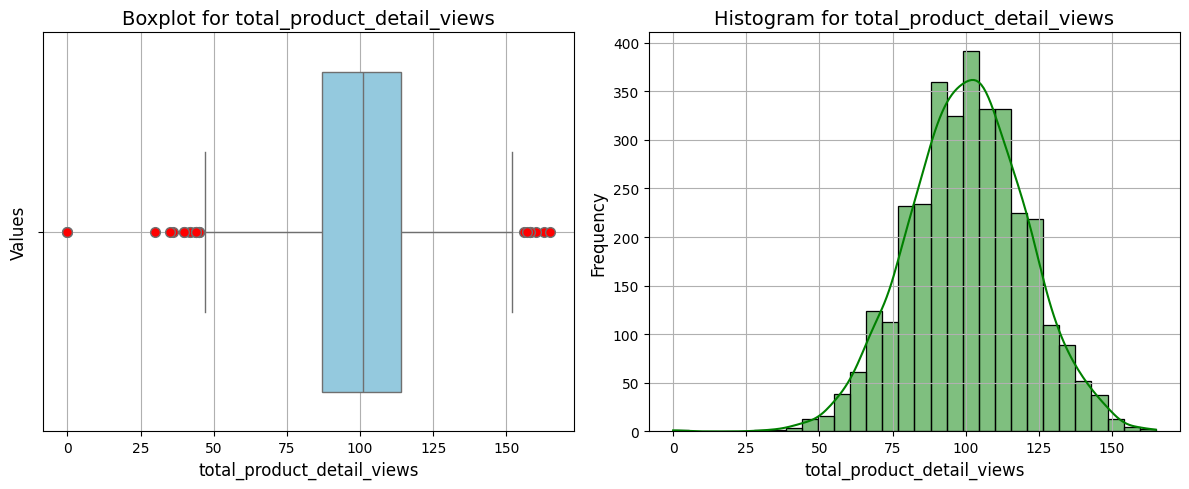

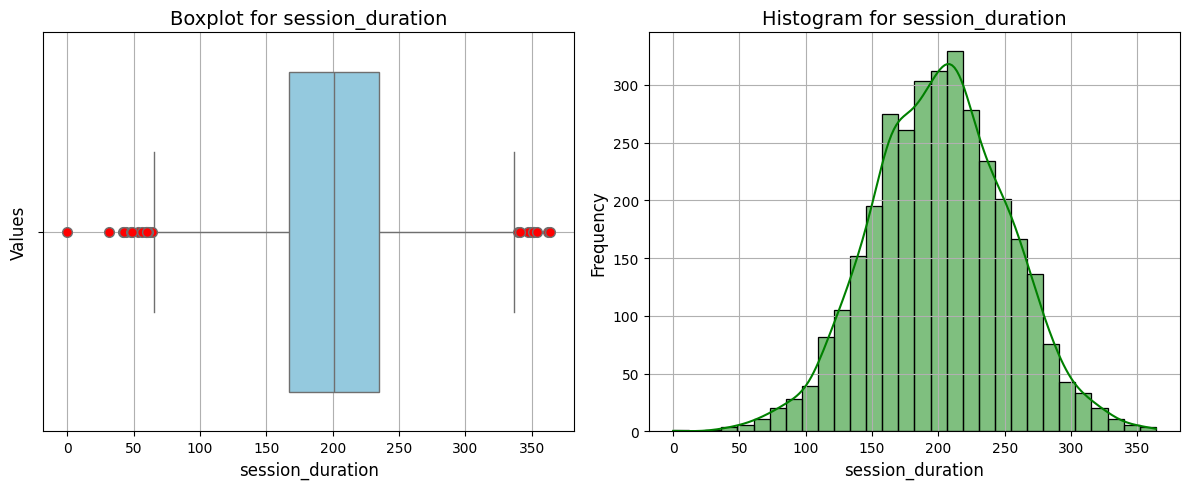

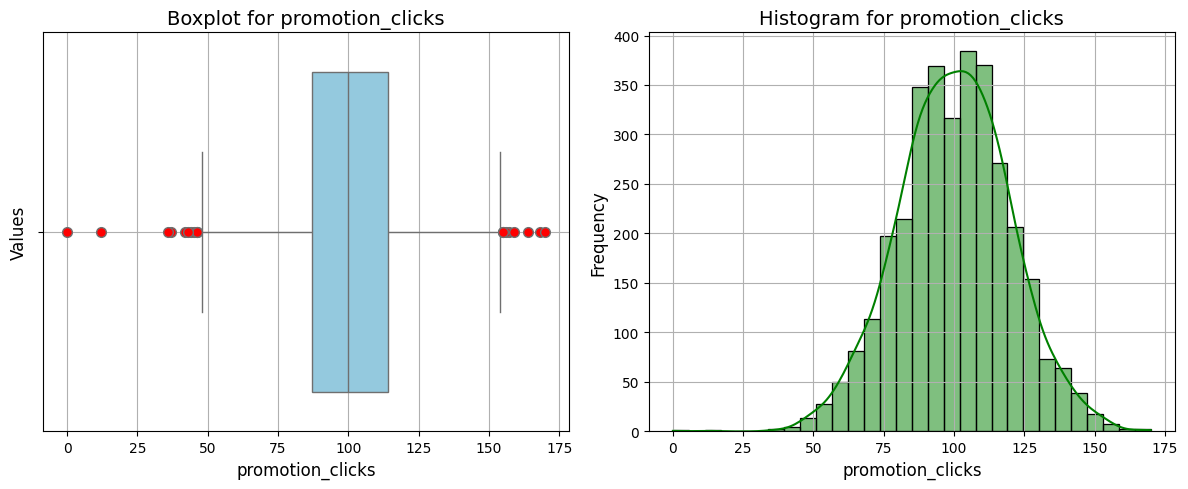

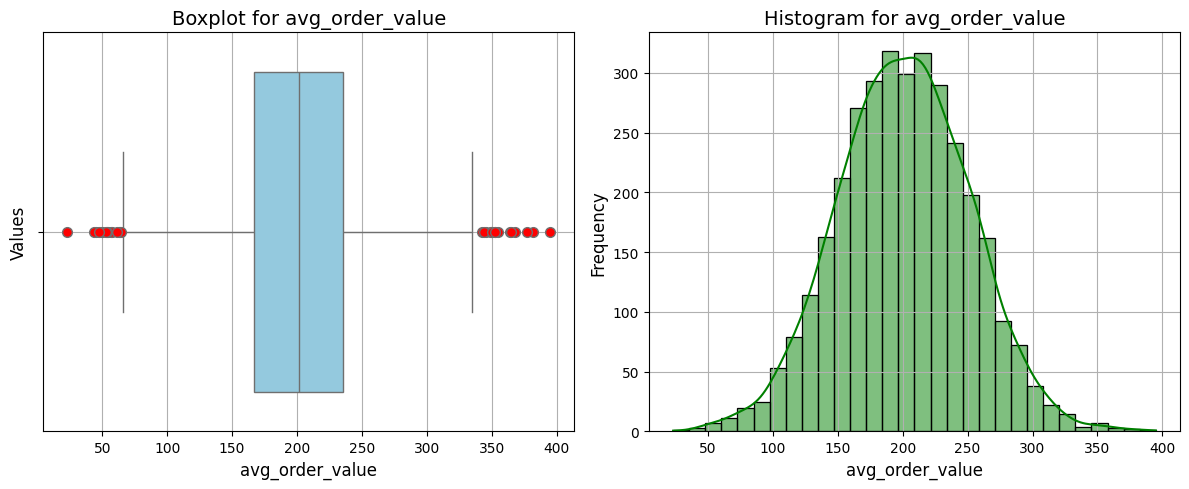

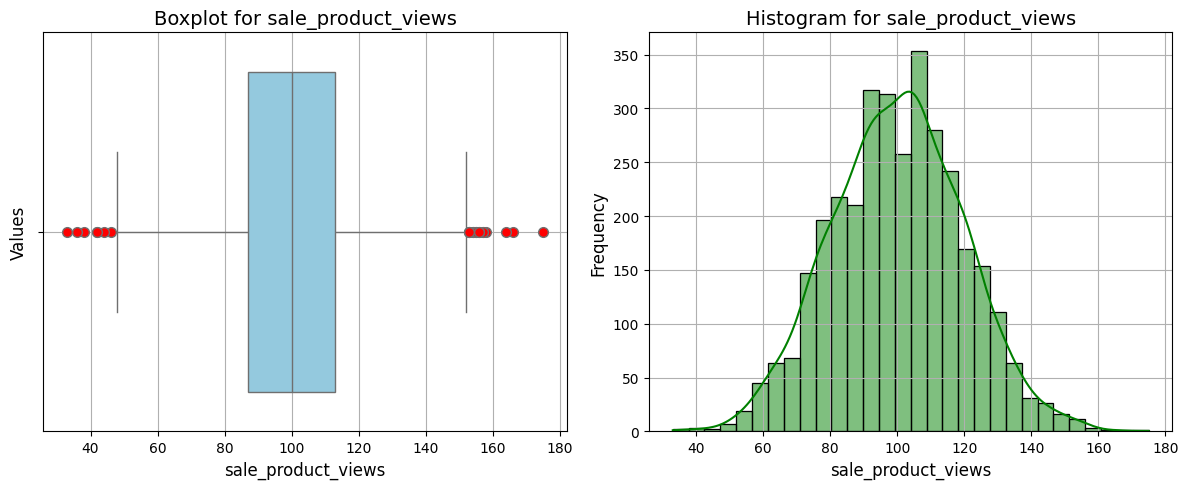

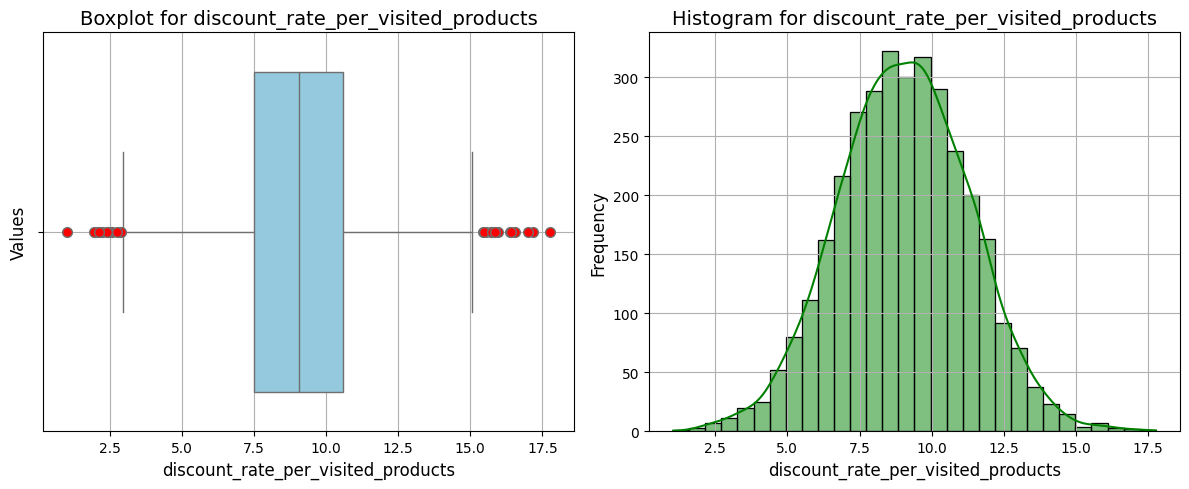

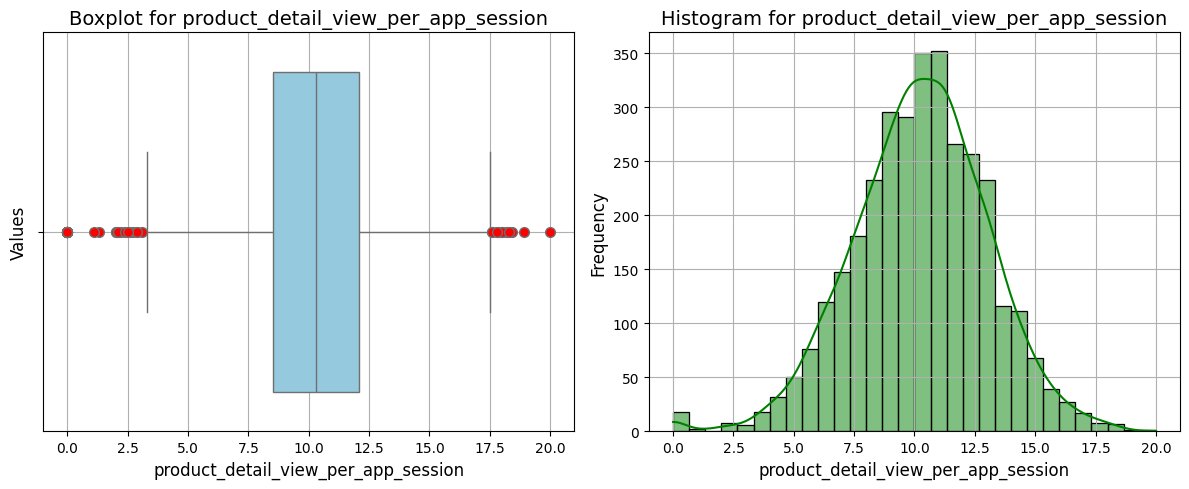

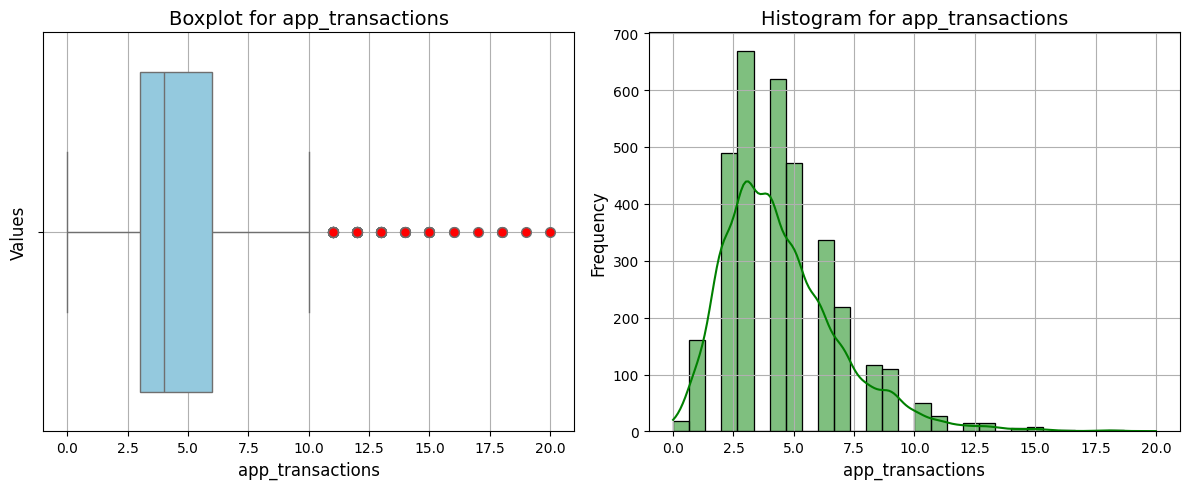

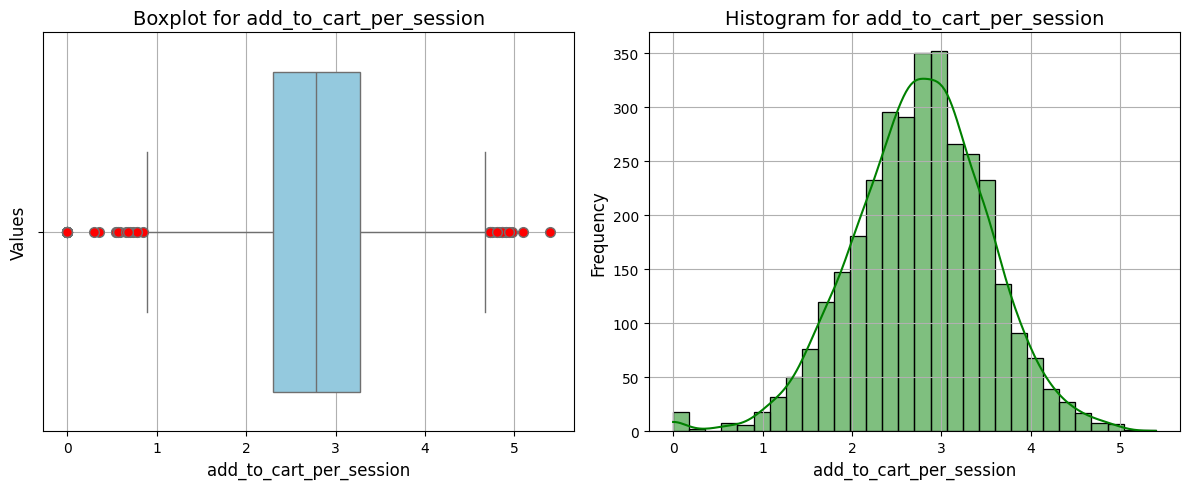

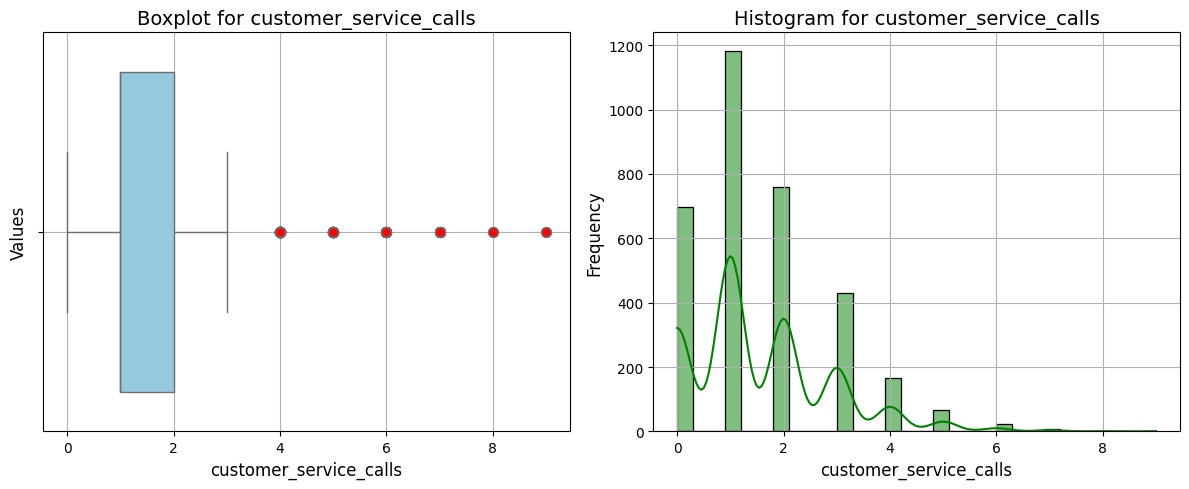

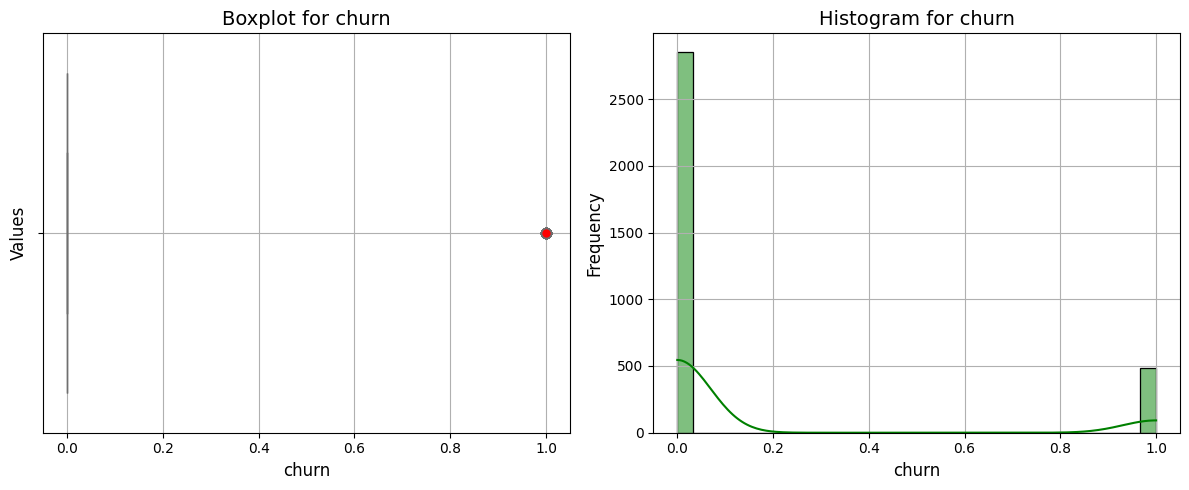

In [22]:
# Loop through the list of variables in df_copy and plot boxplots and histograms
for column in df_copy.columns:
    plt.figure(figsize=(12, 5))  # Set the figure size for both plots

    # Boxplot for outlier detection
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(x=df_copy[column], color='skyblue', fliersize=5,
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 7, 'linestyle': 'none'})
    plt.title(f'Boxplot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid(True)

    # Histogram to check the distribution
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.histplot(df_copy[column], bins=30, kde=True, color='green')  # kde=True adds a density plot
    plt.title(f'Histogram for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


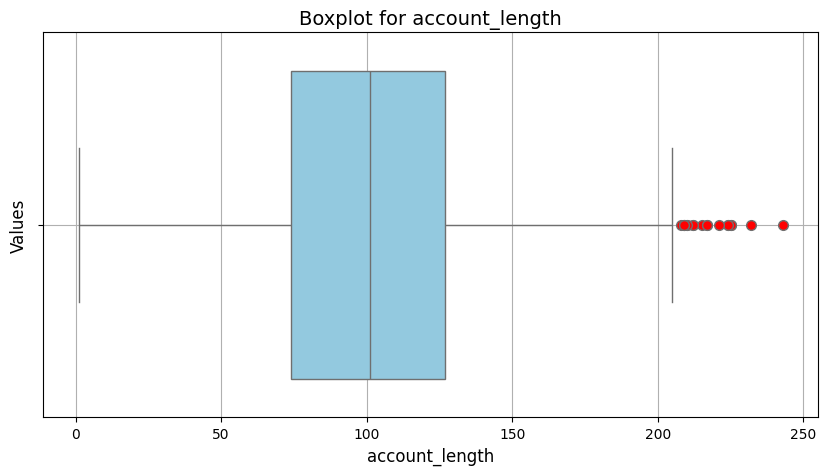

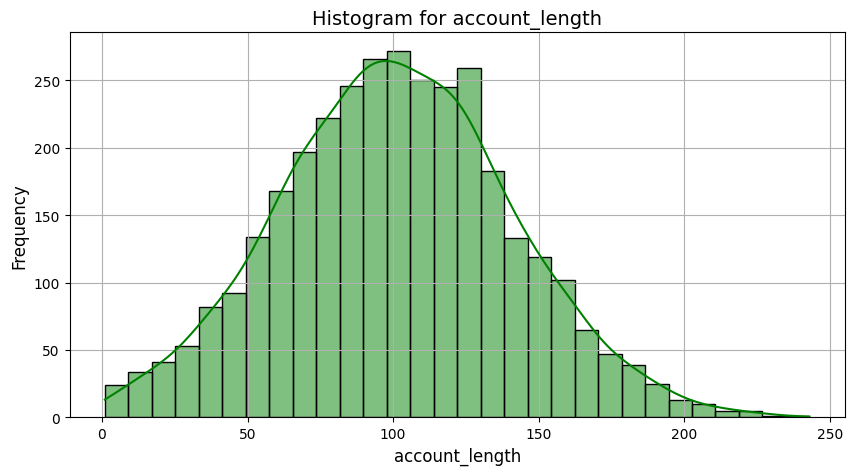

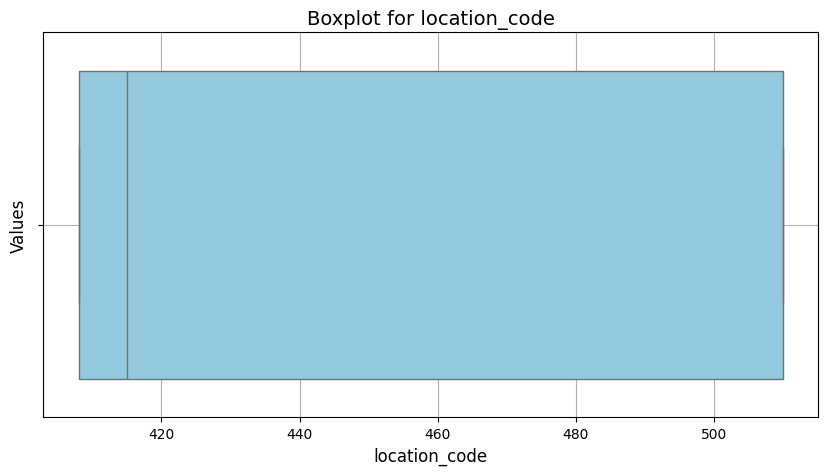

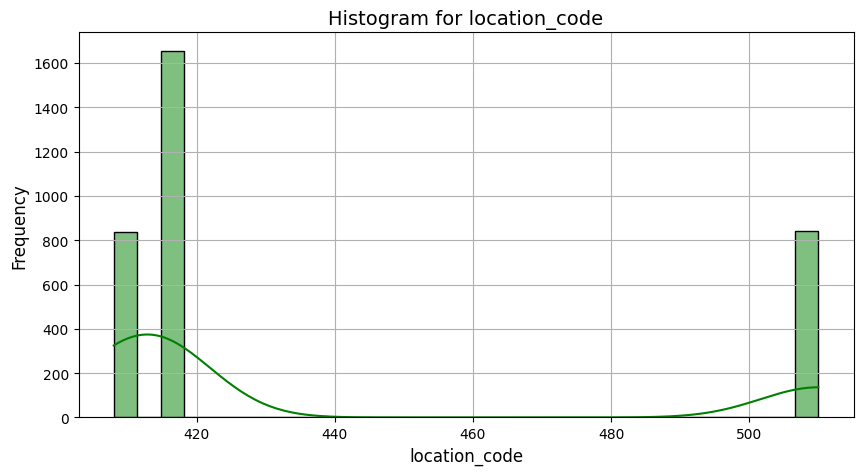

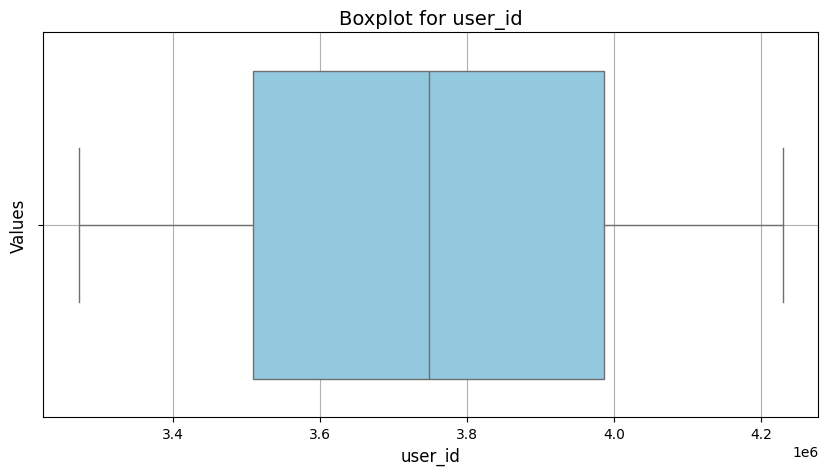

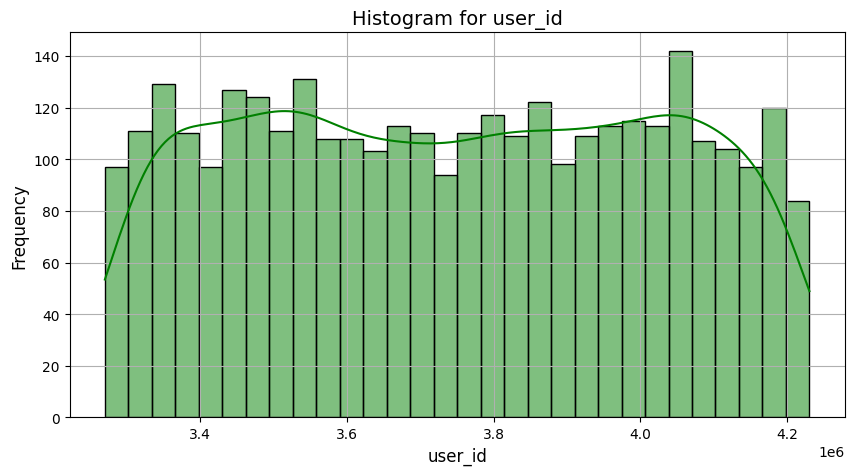

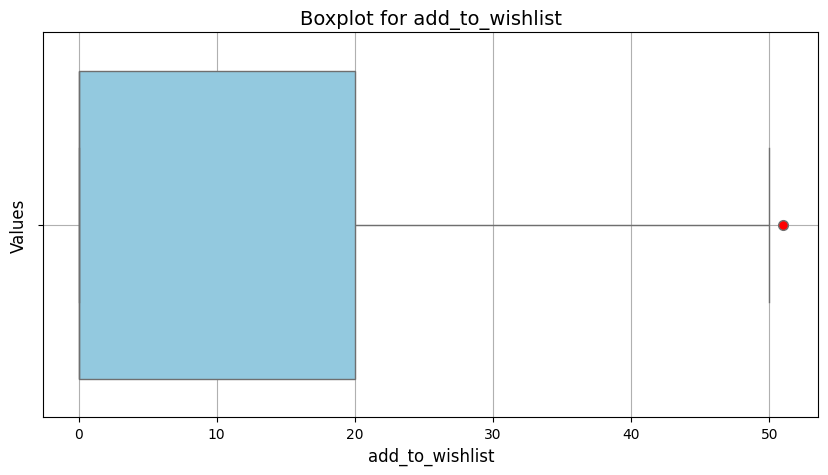

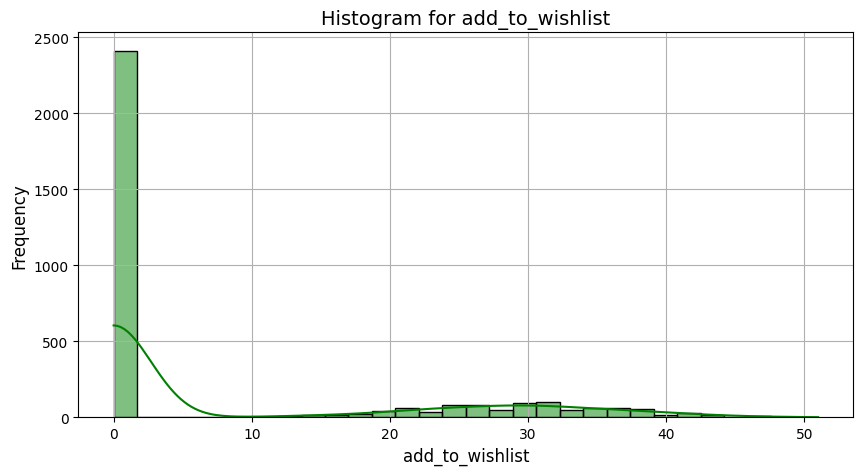

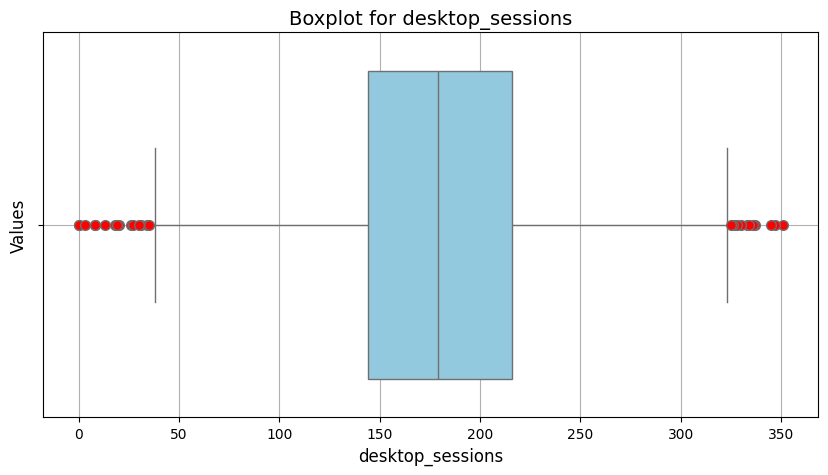

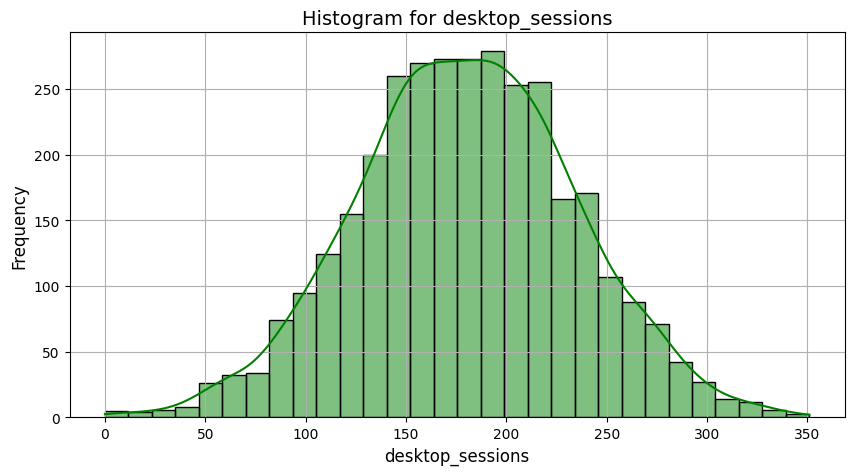

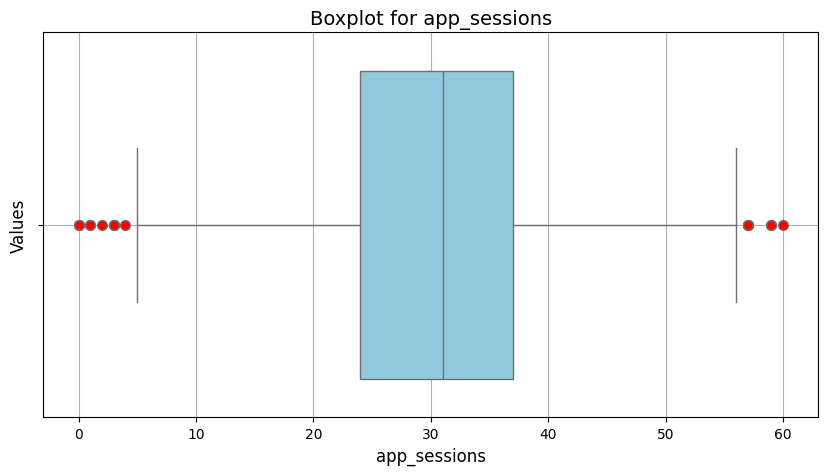

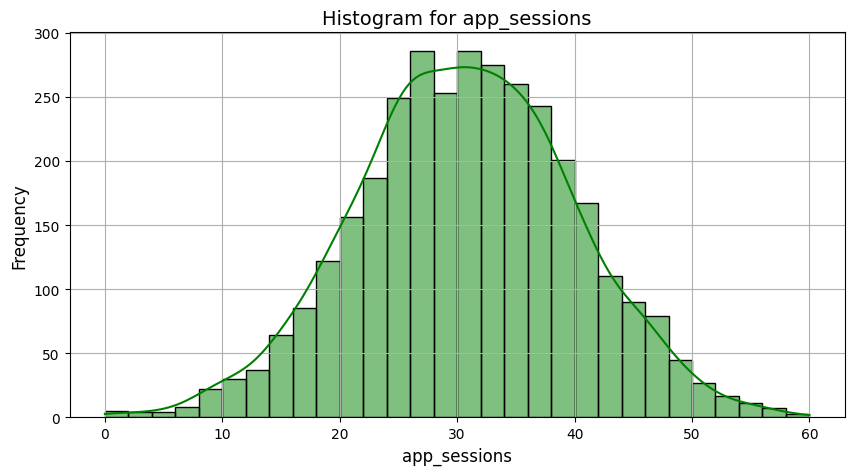

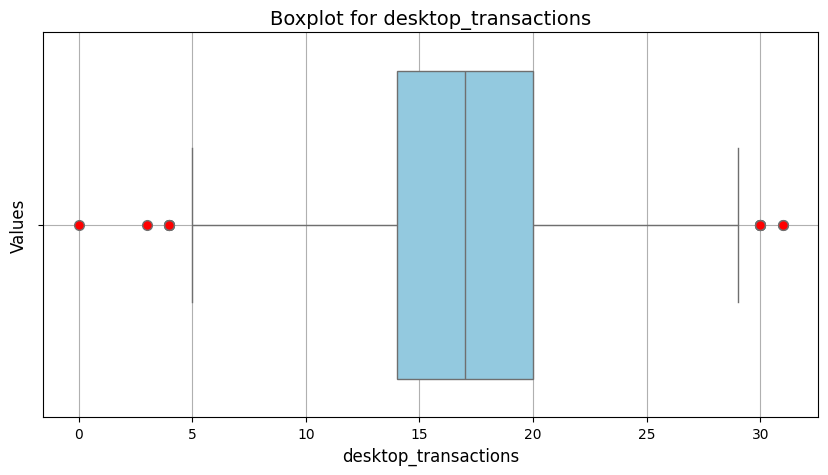

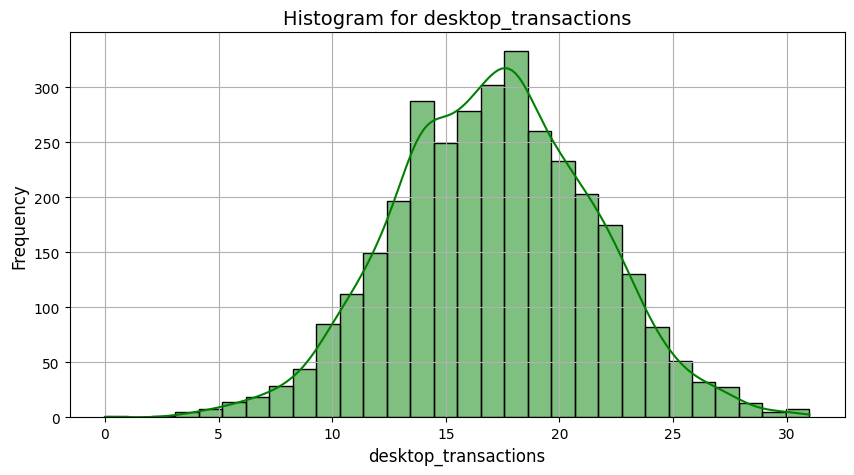

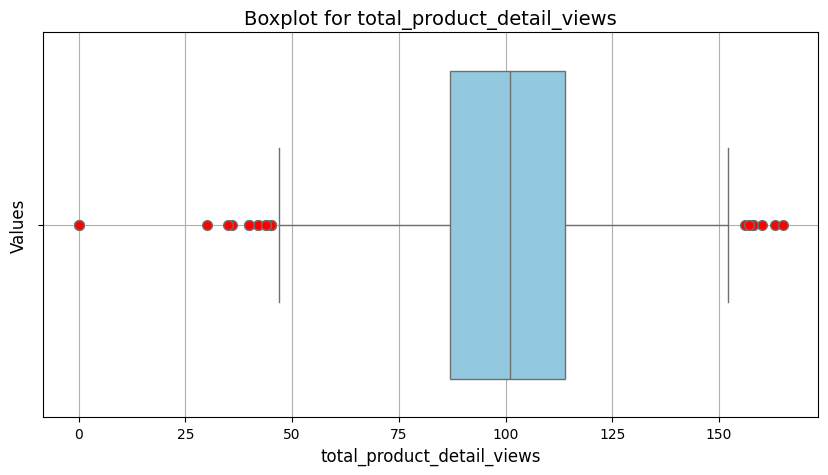

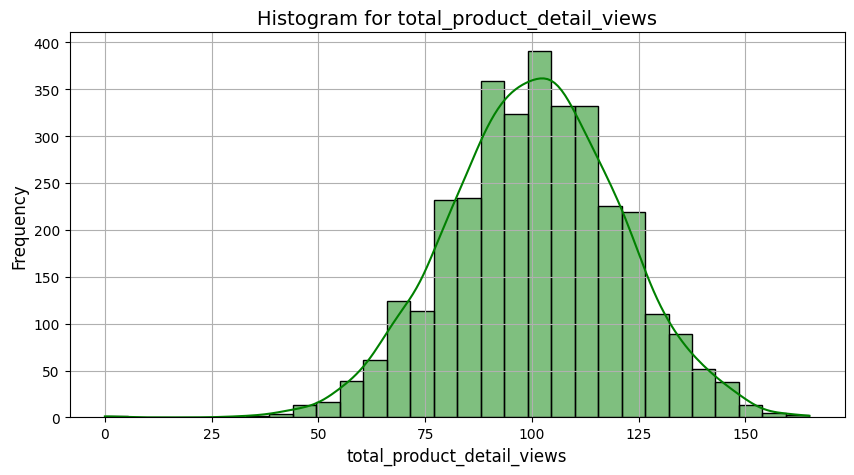

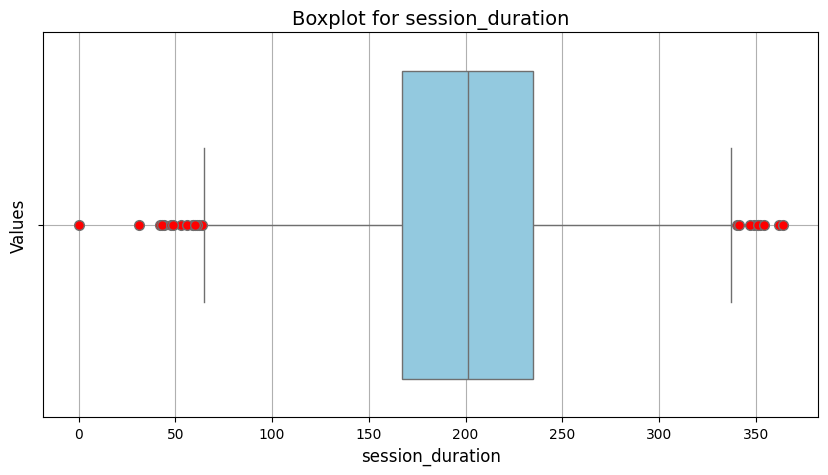

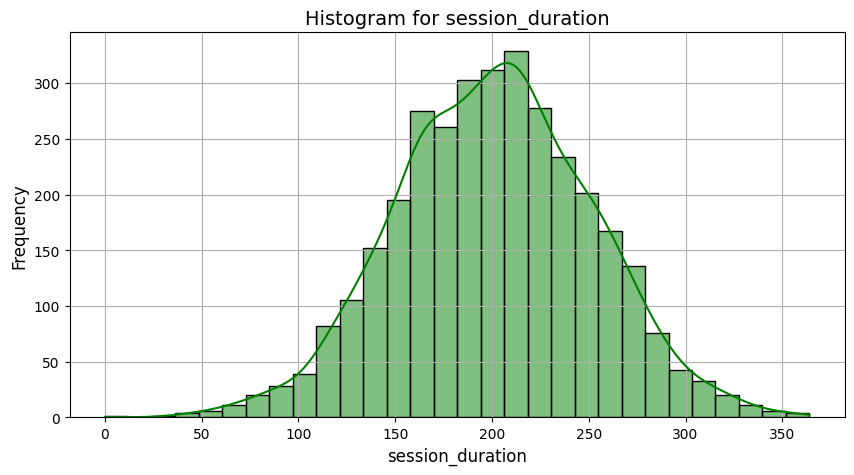

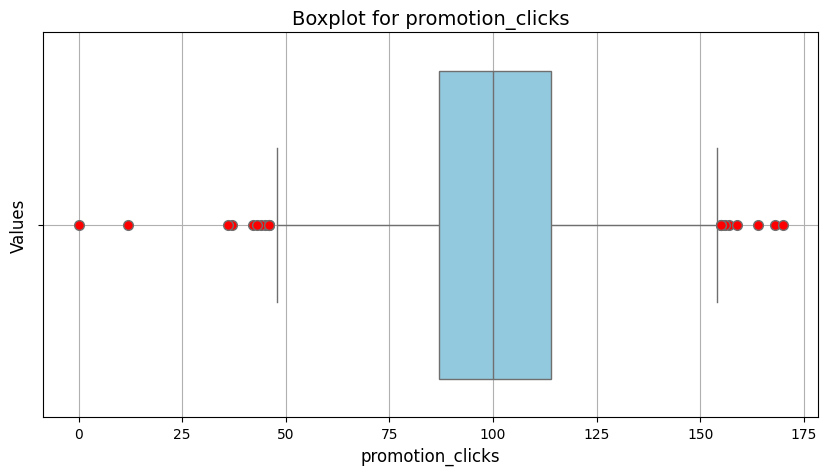

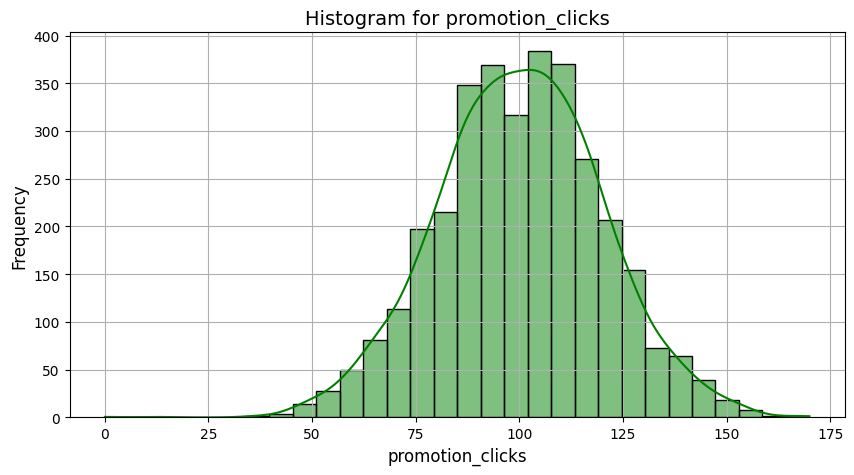

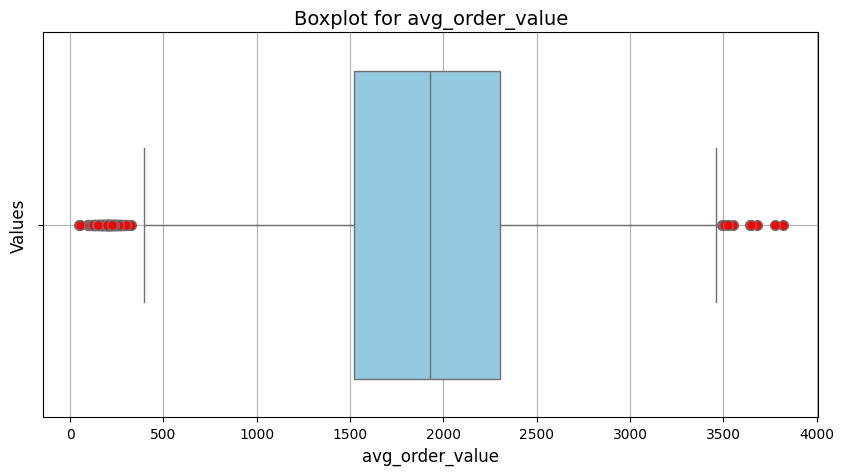

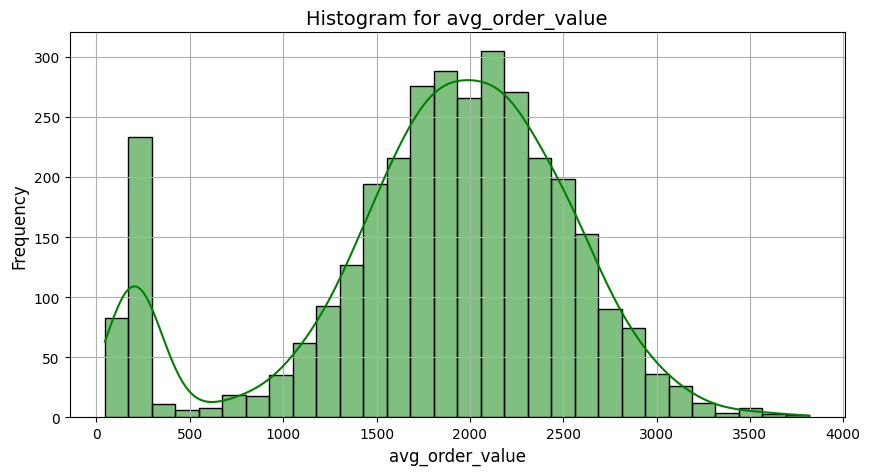

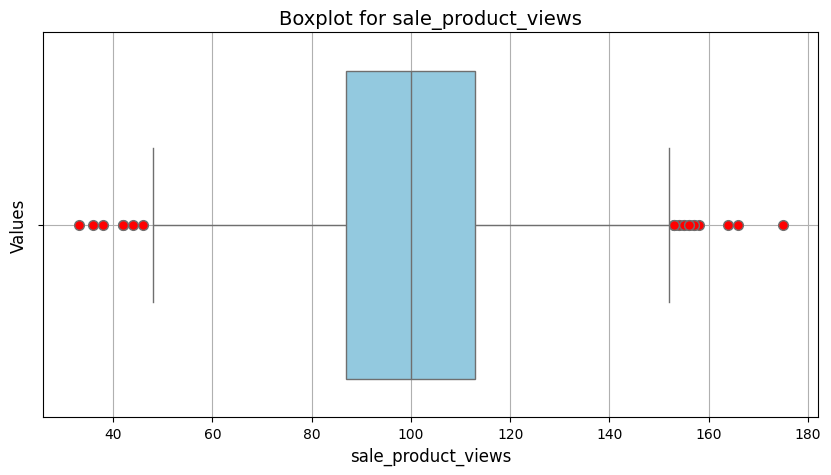

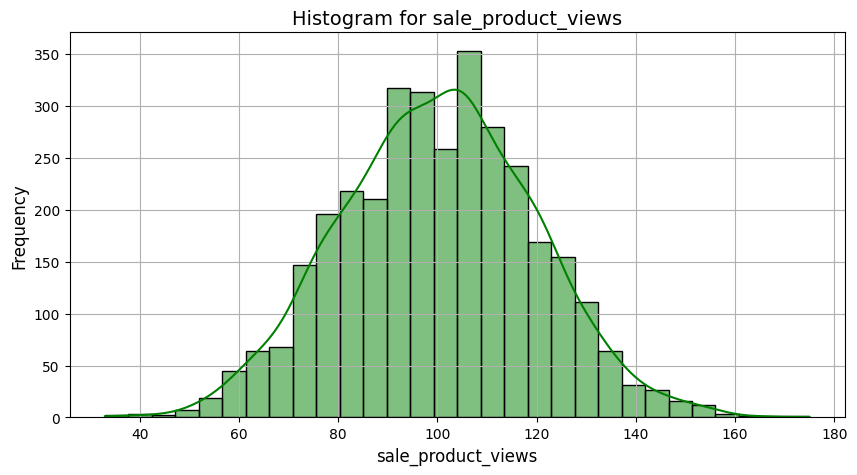

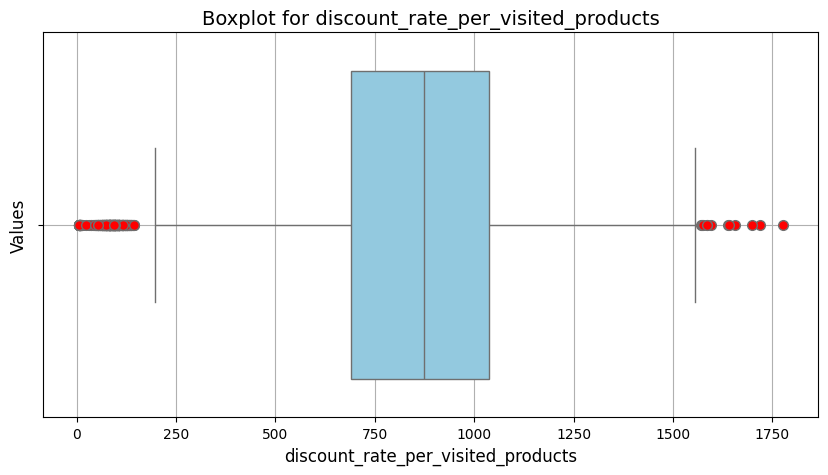

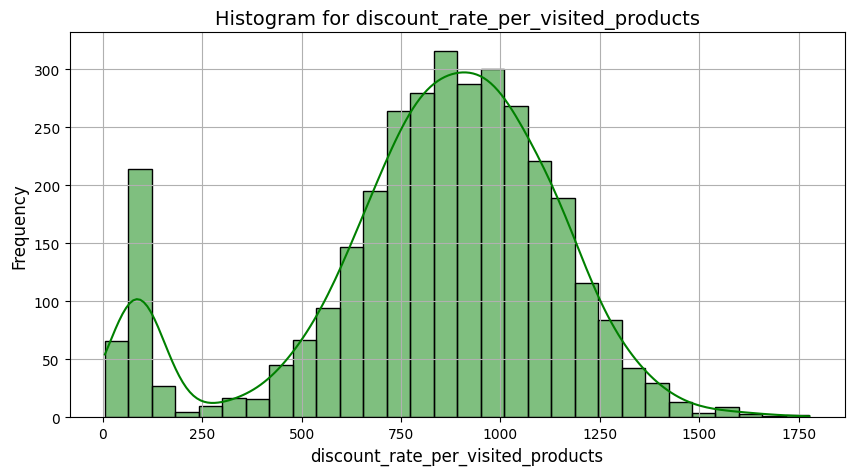

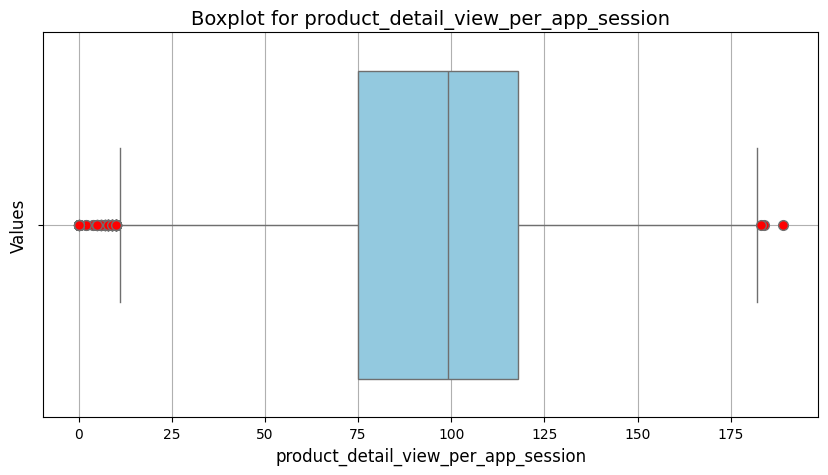

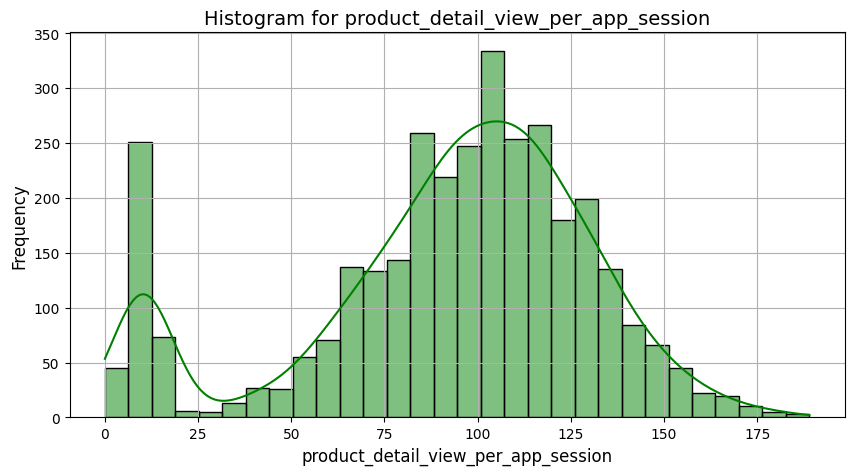

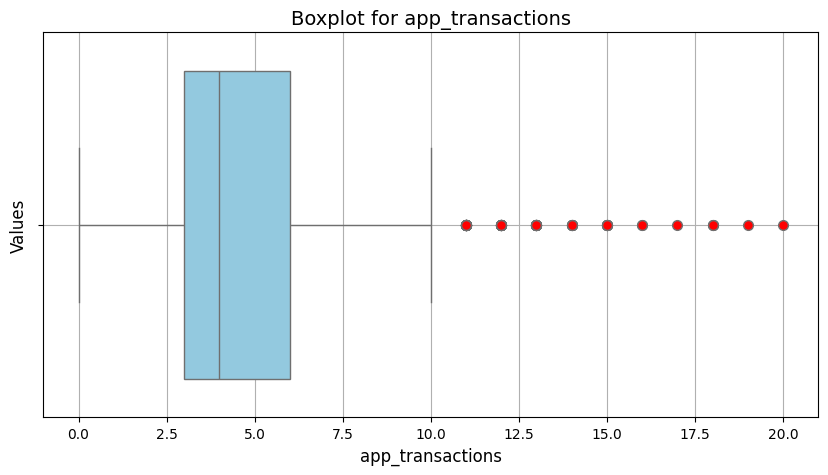

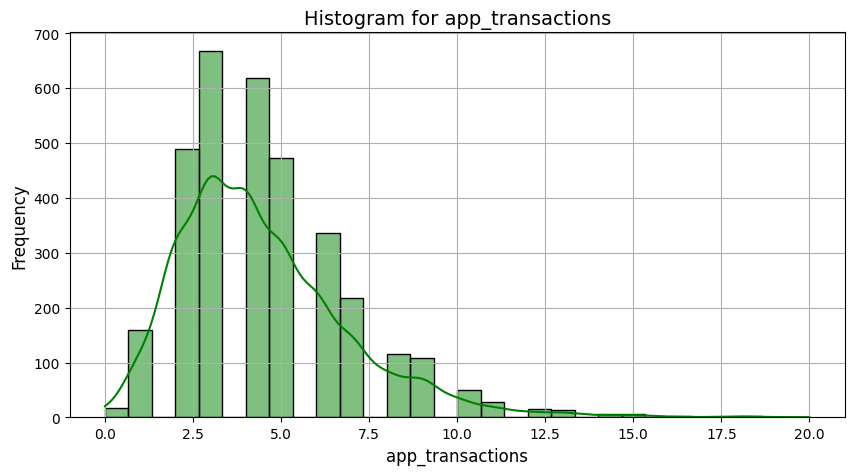

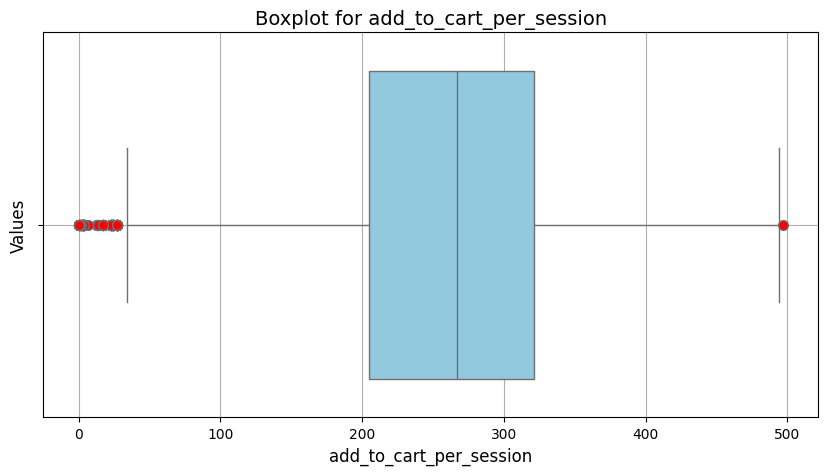

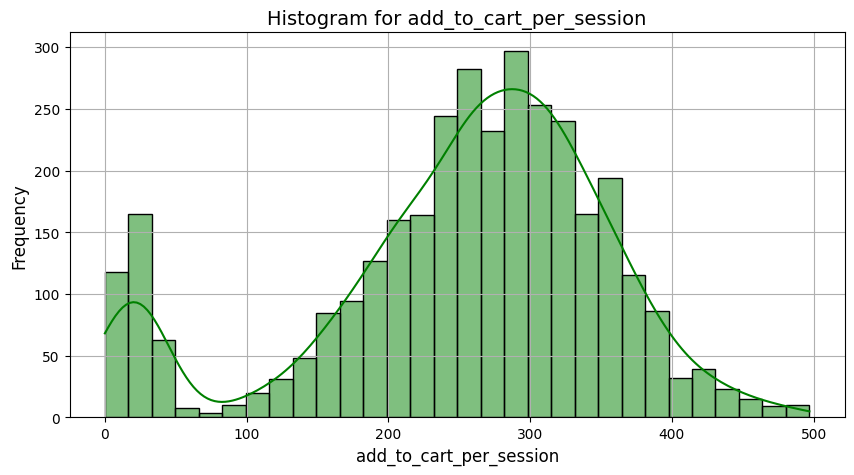

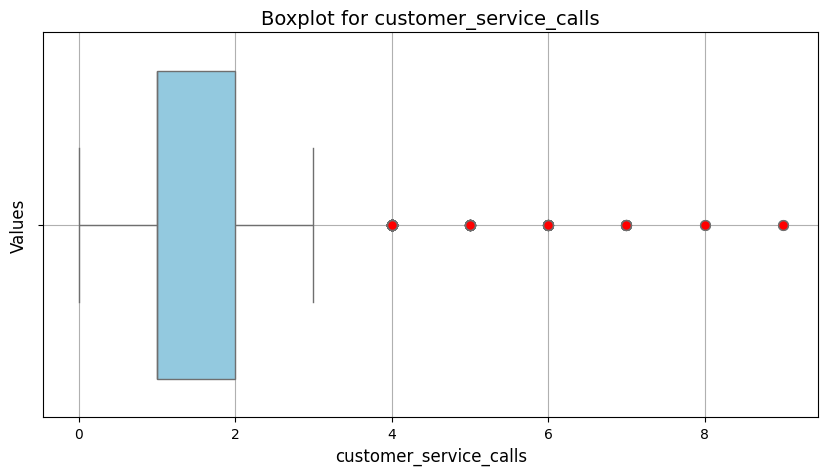

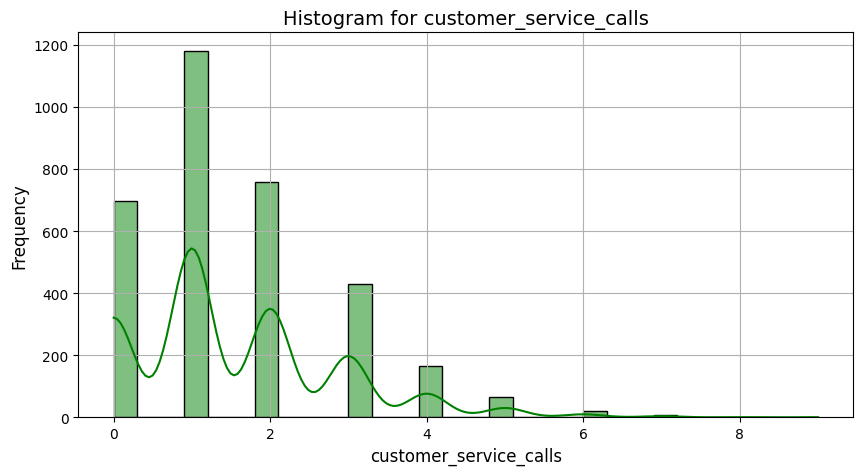

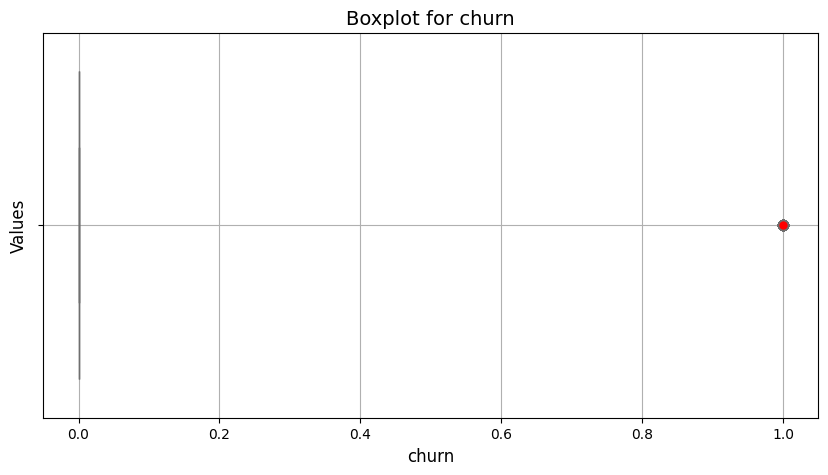

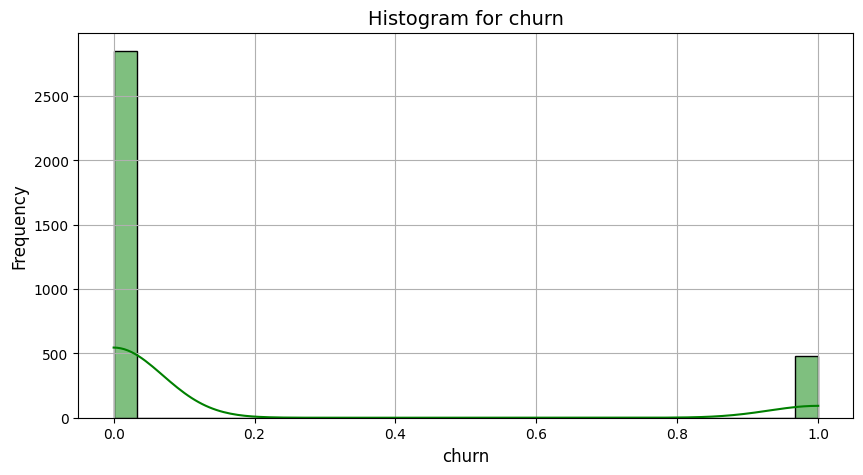

In [ ]:
# Loop through the list of variables in df_copy and plot boxplots and histograms
for column in df.columns:
    # Boxplot for outlier detection
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_copy[column], color='skyblue', fliersize=5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 7, 'linestyle': 'none'})
    plt.title(f'Boxplot for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid(True)
    plt.show()

    # Histogram to check the distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df_copy[column], bins=30, kde=True, color='green')  # kde=True adds a density plot to show the distribution
    plt.title(f'Histogram for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

In [ ]:
# Function to calculate and display outliers using IQR method
def find_outliers(df_copy, column):
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]

    # Get the count of outliers and total percentage of outliers
    num_outliers = outliers.shape[0]
    total_count = df_copy.shape[0]
    percentage_outliers = (num_outliers / total_count) * 100

    # Display the summary
    print(f"Outliers for '{column}':")
    print(f"Number of outliers: {num_outliers}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%")

    # Display the specific outlier values (first few rows)
    if not outliers.empty:
        print(f"Outlier values (showing up to 5): \n{outliers[column].head(5)}")
    else:
        print(f"No outliers found for {column}.")
    print('-' * 50)

# Loop through columns in df_copy and find outliers
for column in columns:
    find_outliers(df_copy, column)

Outliers for 'account_length':
Number of outliers: 18
Percentage of outliers: 0.54%
Outlier values (showing up to 5): 
197    208
238    215
309    209
416    224
817    243
Name: account_length, dtype: int64
--------------------------------------------------
Outliers for 'location_code':
Number of outliers: 0
Percentage of outliers: 0.00%
No outliers found for location_code.
--------------------------------------------------
Outliers for 'user_id':
Number of outliers: 0
Percentage of outliers: 0.00%
No outliers found for user_id.
--------------------------------------------------
Outliers for 'add_to_wishlist':
Number of outliers: 1
Percentage of outliers: 0.03%
Outlier values (showing up to 5): 
845    51
Name: add_to_wishlist, dtype: int64
--------------------------------------------------
Outliers for 'desktop_sessions':
Number of outliers: 27
Percentage of outliers: 0.81%
Outlier values (showing up to 5): 
15     333
156    337
197    327
365    351
605    336
Name: desktop_sessio

# 7. Conclusions based on visualisations [Sachin]

- All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers **"True outliers"**.
- If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean (example code below if you need to use it)

### From the outlier analysis, we can conclude that the most of the most of the numeric variables contains outliers. The presence of outliers in this dataset represents naturak variations in customer behavior for an e-commerce platform rather than incorrect data. Below are some of the key metrics where there is a significant variability in customer activities.



* Average Order Value : 10.11% of outliers, which may be unusually customers making high-value purchases.
* Discount Rate Per Visited Products : 9.57% of outliers, this could mainly be due to customers who utilize discounts heavily.
* Add to Cart per Session : 8.52% of outliers, reflecting customers who add large number of items to their cart during one session.
* Customer Service Calls : 8.01% of outliers, indicating that ceratin customers contact customer service frequently.
* Product Detail View per App Session : 6.06% of outliers, where users may be deeply exploring product details before making a purchase.

For variables like **churn**, which shows a 14.49% of outlier, indicating that customers with a high likelihood of disengagement, needs special attention.

From the above information, since these outliers are not errors but natural variations, removing them could lead to loss of meaningful information.







# 8. Analysis of the Dependent variable (Churn) vs Idependent variables [Sachin]

Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka idependent varialbes in our dataset can help us predict customers deciding to stop using the product, aka "churn".

Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

### Correlation Matrix :

In [ ]:
df_corr = df_copy.select_dtypes(include=['number'])  # Select only numerical columns

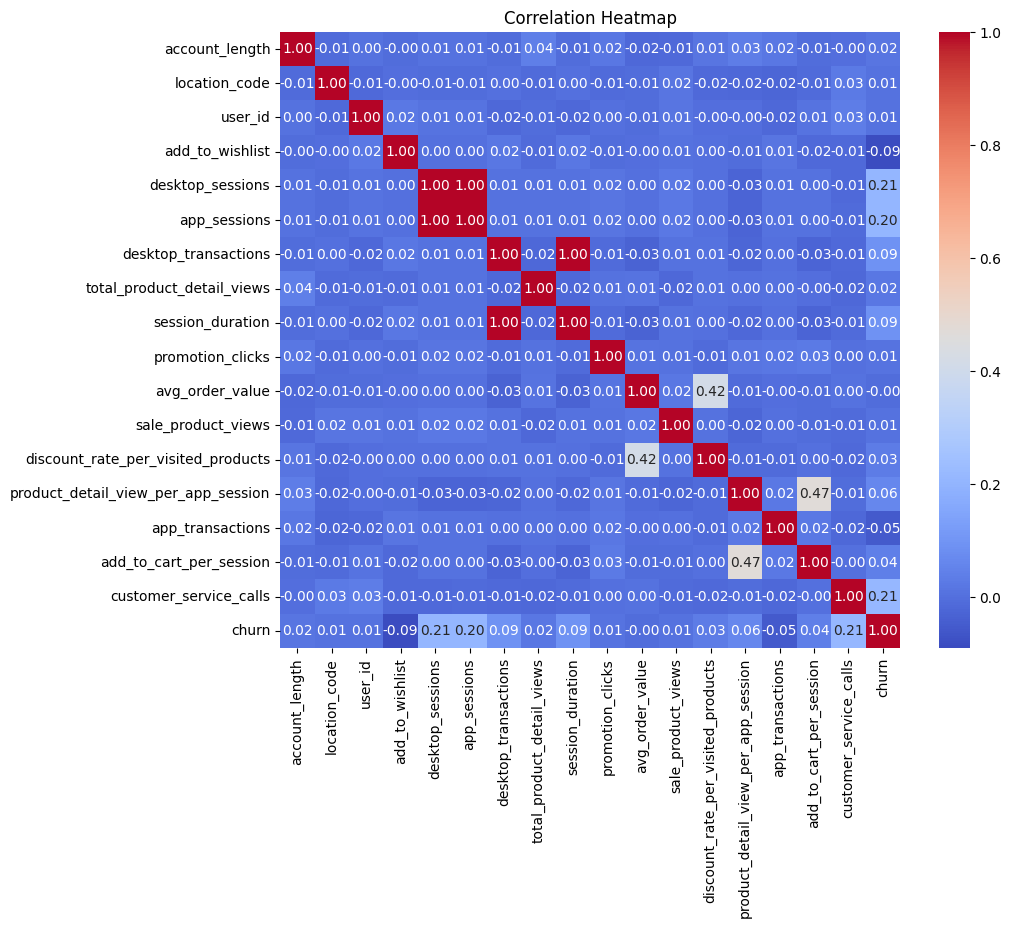

In [ ]:
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Summary on Correlation Matrix :    
The correlation matrix provides valuable insights into factors influencing customer churn. There's a moderate positive correlation (0.21) between desktop sessions and churn, implying that frequent desktop users may be encountering issues that lead to dissatisfaction. Likewise, app sessions show a similar positive correlation (0.20), indicating that heavy mobile users could be facing frustrations that contribute to churn. A particularly strong correlation is seen with customer service calls (0.21), suggesting that unresolved problems or poor service interactions are major contributors to customer attrition. While location code does not exhibit a strong correlation with churn, it could still be useful to investigate potential regional differences to uncover any subtle patterns.

Focusing on these variables—desktop and app sessions, as well as customer service experiences—can guide companies in developing targeted strategies to enhance customer satisfaction. Addressing these issues proactively can help lower churn and improve service quality. This analysis serves as a clear roadmap for identifying key areas where intervention may be most effective in reducing churn rates.

### Visualizing Relationships :

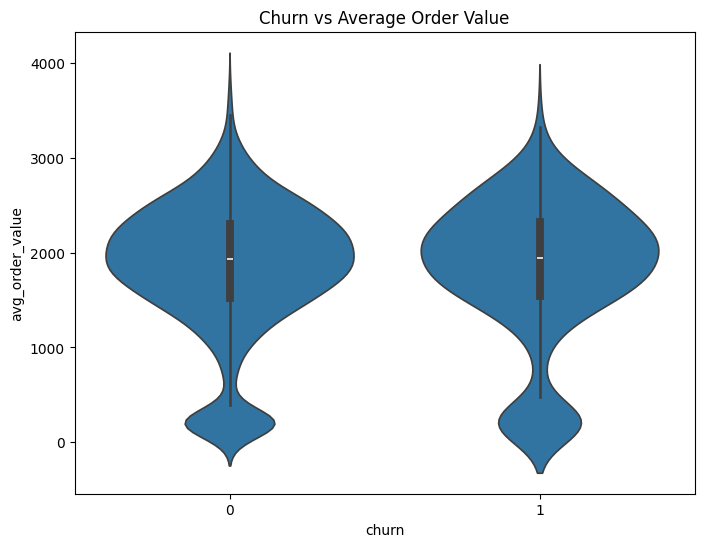

In [ ]:
# Example: Relationship between 'avg_order_value' and 'churn'
plt.figure(figsize=(8, 6))
sns.violinplot(x='churn', y='avg_order_value', data=df_corr)
plt.title('Churn vs Average Order Value')
plt.show()


### Insight : The violin plot reveals that while the average order value (Average Order Value) is similar for churned and non-churned customers, there's a slight tendency for churned customers to have lower AOVs. Additionally, outliers exist in both groups, indicating a few customers with significantly higher or lower Average Order Value's. This suggests that Average Order Value might be one factor influencing churn.

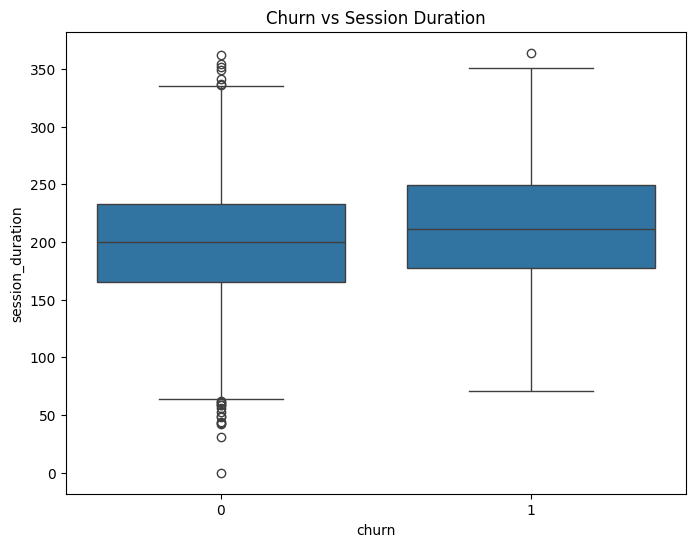

In [ ]:
#Churn vs Session Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='session_duration', data=df_corr)
plt.title('Churn vs Session Duration')
plt.show()

### Insight : While the median session duration for churned customers is slightly higher than that of non-churned customers, this difference is not substantial. The presence of outliers in both groups highlights the importance of considering individual customer behavior. There are some customers with significantly longer or shorter session durations, regardless of whether they churned or not.

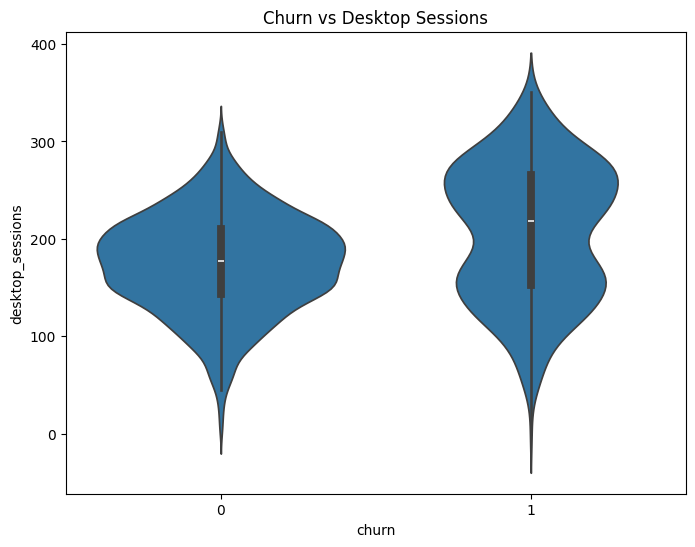

In [ ]:
# Churn vs Desktop Sessions
plt.figure(figsize=(8, 6))
sns.violinplot(x='churn', y='desktop_sessions', data=df_corr)
plt.title('Churn vs Desktop Sessions')
plt.show()


### Insight : The violin plot reveals that while most users, churned or not, have a similar range of desktop sessions, the median number of sessions for churned customers is slightly higher than the non-churned customers. This could indicate that some customers who are more engaged on the desktop platform still end up churning, possibly due to factors such as dissatisfaction or the expectations which are not me due to high usage.

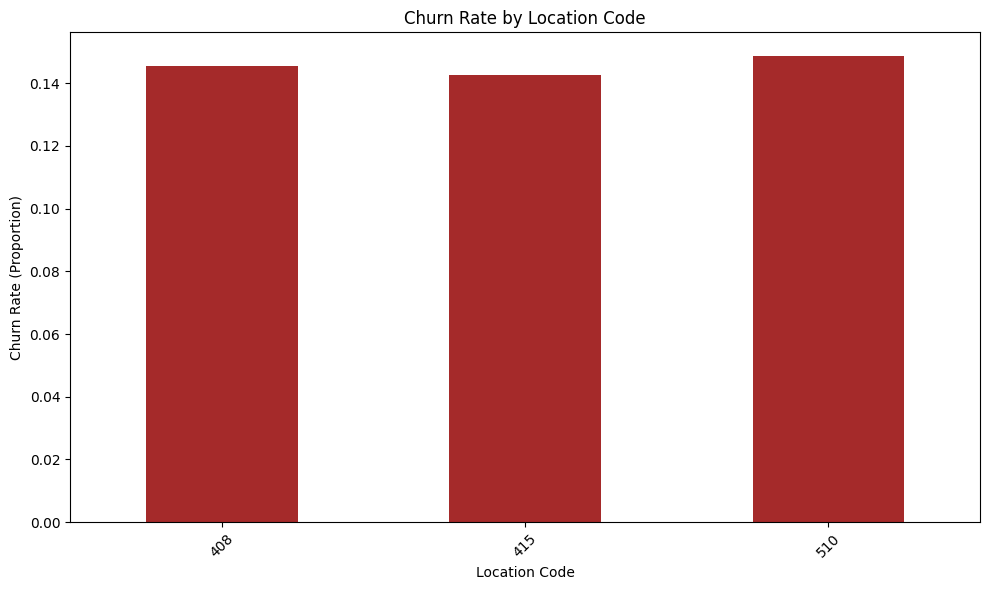

In [ ]:
#Churn vs location code
location_churn = df_corr.groupby('location_code')['churn'].mean()
plt.figure(figsize=(10, 6))
location_churn.plot(kind='bar', color='brown')
plt.title('Churn Rate by Location Code')
plt.ylabel('Churn Rate (Proportion)')
plt.xlabel('Location Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insight : This bar chart illustrates the churn rate for customers across the three location codes: 408, 415, and 510. The churn rates are relatively consistent across these locations, all hovering around 14%, suggesting that location is not a strong determinant of customer churn. While the location code 415 shows a marginally lower churn rate compared to 408 and 510, the difference is not substantial enough to imply a significant geographical impact on customer retention. The uniformity in churn rates across locations indicates that other factors may play a more influential role in determining churn.

### Overall Summary for the Analysis of Churn(Dependent Variable) vs Independent Variables :

The analysis shows that churn is influenced by various independent factors, though no single variable serves as a definitive predictor. For example, while churned customers tend to have slightly lower Average Order Values (Average Order Value's), the presence of outliers among both churned and non-churned groups suggests that Average Order Value alone cannot explain churn behavior. Similarly, while churned customers show a marginally higher median session duration, the small difference and broad range of behaviors indicate that churn can happen regardless of session length. Even engagement indicators, like desktop sessions, reveal that highly engaged customers may still churn, potentially indicating dissatisfaction despite frequent usage.

The analysis of location codes reinforces the notion that churn is not driven by geography, with similar churn rates across different regions. This implies that factors such as product satisfaction, customer service, and user experience may play a more critical role than location or specific behaviors like session duration or order value.

To address churn effectively, marketing strategies such as focusing on enhancing overall customer experience and trust-building measures. Prioritizing improvements in customer service and personalizing user interactions could foster stronger engagement. Additionally, addressing potential trust issues by promoting secure transactions and creating incentives for customers to save their payment details might increase retention. Instead of targeting a single metric, a holistic approach that focuses on improving the full customer journey is likely to yield better results in reducing churn.








# 9. Plot Churn against the categorical data [Naren]

In [ ]:
#df_copy

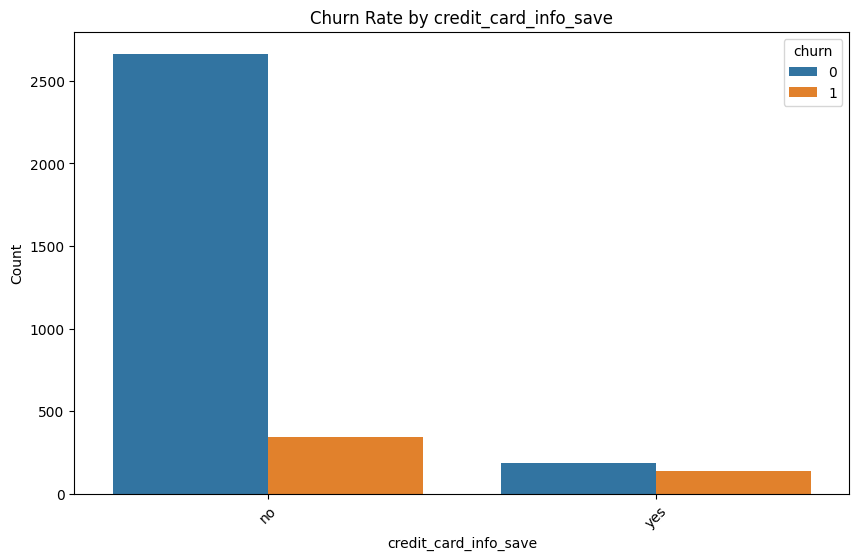

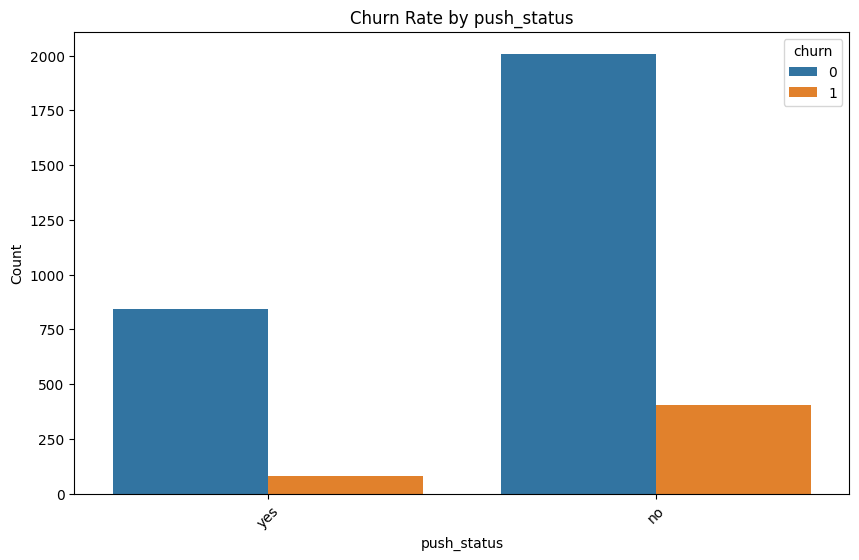

In [ ]:
for column in df_copy.select_dtypes(include=['object']).columns:
  if column != 'churn':  # Exclude the target variable
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='churn', data=df_copy)
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# 9.1 Observations from the categorical columns plots

- Majority of customers are in location code 415
- Majority of customers don't allow push notifications
- Majority of customers don't store their credit card information on the side

**Intrepretation of Churt Vs Card saves**


1.   A significantly higher proportion of customers who did not save their credit card information remained with the service.
2.   The number of customers who saved their credit card information is low, and both churn and retention rates in this group are relatively balanced.



**Interpretation of Churn Vs Push_status**


*   Customers who receive push notifications are more likely to stay with the service, with a very low churn rate.
*   The churn rate is notably higher for customers who do not receive push notifications, although the majority of this group still remains with the service.



# 9.2 Plot categorical data against the Churn

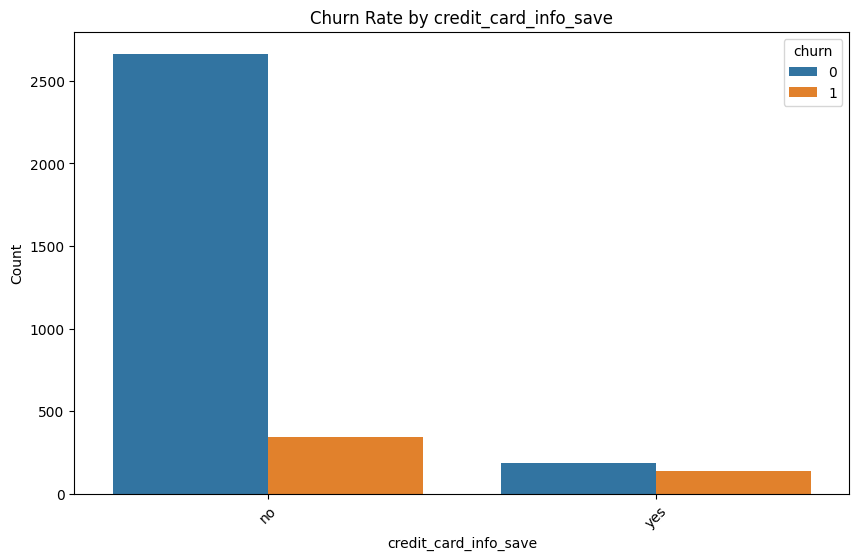

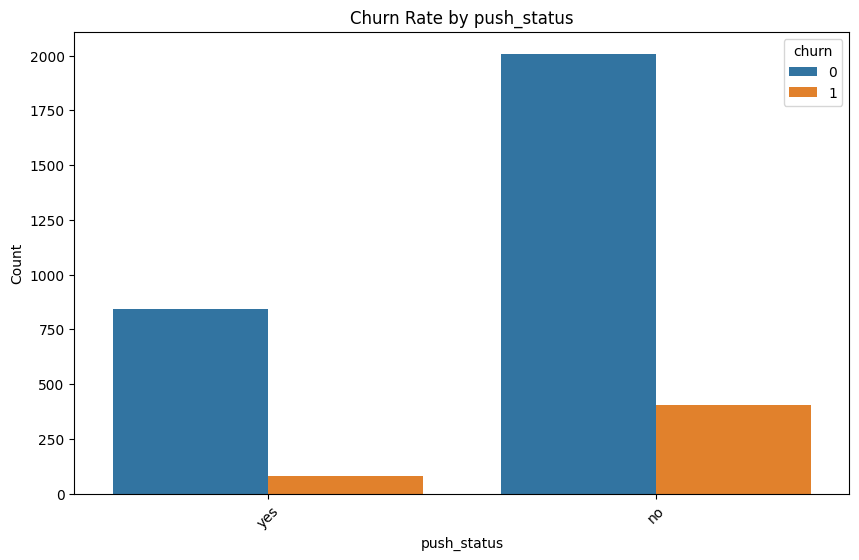

In [ ]:

for column in df_copy.select_dtypes(include=['object']).columns:
  if column != 'churn':  # Exclude the target variable
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='churn', data=df_copy)
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 9.3 Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.